# Data Loading and Pre-processing

In [ ]:
import os

import cv2

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle

from keras.applications.xception import Xception,preprocess_input

from sklearn.model_selection import train_test_split

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


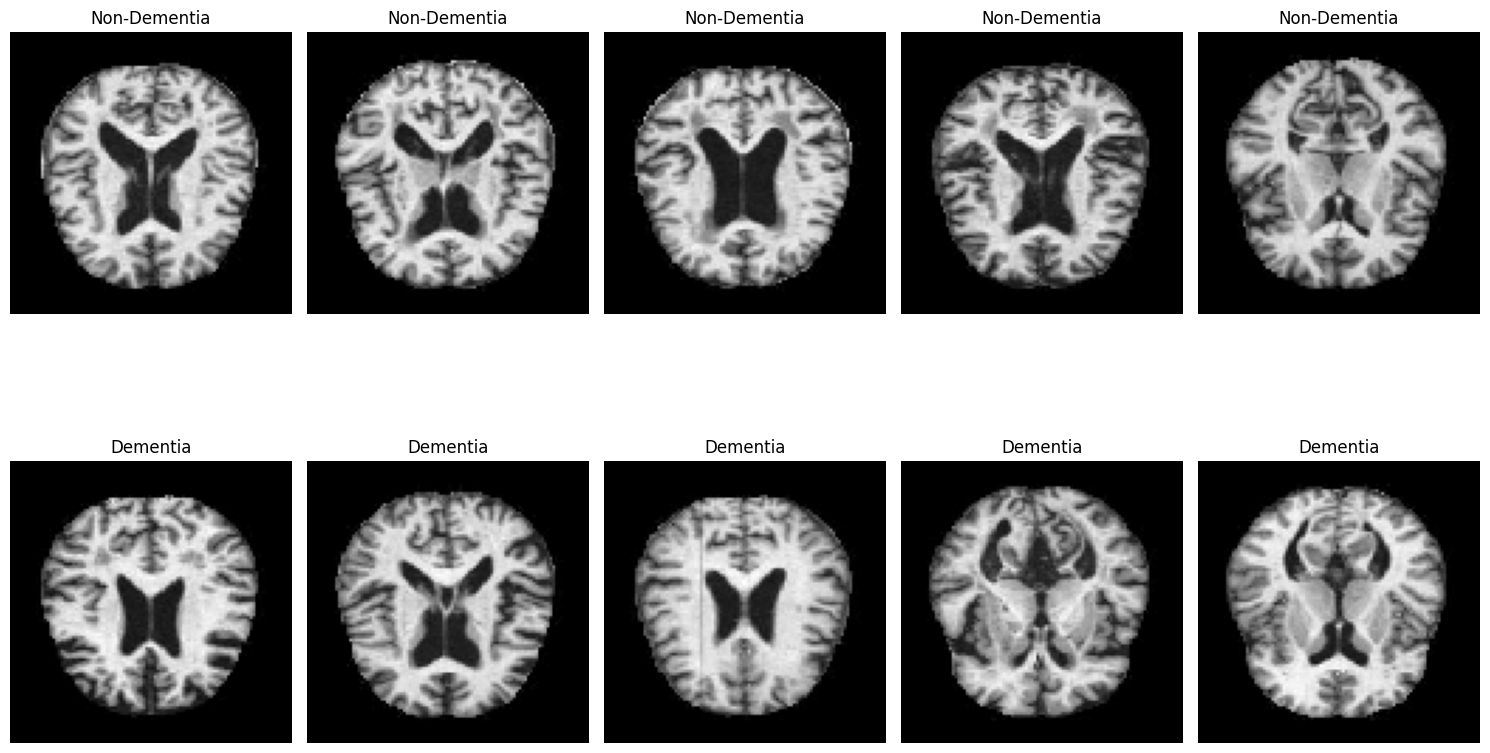

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle

# Updated label mapping
label_to_class = {
    'MildDemented': 1,  # Separate class
    'ModerateDemented': 1,  # Combined as Dementia
    'NonDemented': 0,  # Combined as Dementia
    'VeryMildDemented': 1  # Combined as Dementia
}

class_to_label = {0: 'Non-Dementia', 1: 'Dementia'}  # Reverse mapping
n_classes = len(class_to_label)

def get_images(dir_name='/content/drive/MyDrive/Computer Vision Project /Alzheimer_s Dataset 2', label_to_class=label_to_class):
    Images = []
    Classes = []

    for j in ['/train', '/test']:
        for label_name in os.listdir(dir_name + str(j)):
            # Skip unknown labels to avoid KeyError
            if label_name not in label_to_class:
                continue

            cls = label_to_class[label_name]

            for img_name in os.listdir('/'.join([dir_name + str(j), label_name])):
                img_path = '/'.join([dir_name + str(j), label_name, img_name])
                img = load_img(img_path, target_size=(100, 100))
                img = img_to_array(img)

                Images.append(img)
                Classes.append(cls)

    Images = np.array(Images, dtype=np.float32)
    Classes = np.array(Classes, dtype=np.float32)
    Images, Classes = shuffle(Images, Classes, random_state=0)

    return Images, Classes

def display_images(images, classes, n_images=5):
    plt.figure(figsize=(15, 10))

    for cls in range(n_classes):
        cls_images = images[classes == cls]

        for i in range(min(n_images, len(cls_images))):
            plt.subplot(n_classes, n_images, cls * n_images + i + 1)
            plt.imshow(cls_images[i] / 255.0)  # Normalize
            plt.axis('off')
            plt.title(class_to_label[cls])

    plt.tight_layout()
    plt.show()

Images, Classes = get_images()
display_images(Images, Classes)


In [ ]:
Images.shape

(6400, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    Images, Classes, test_size=0.25, stratify=Classes, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


# Experiment 1: Simple Convolutional Network








In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Running experiment 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


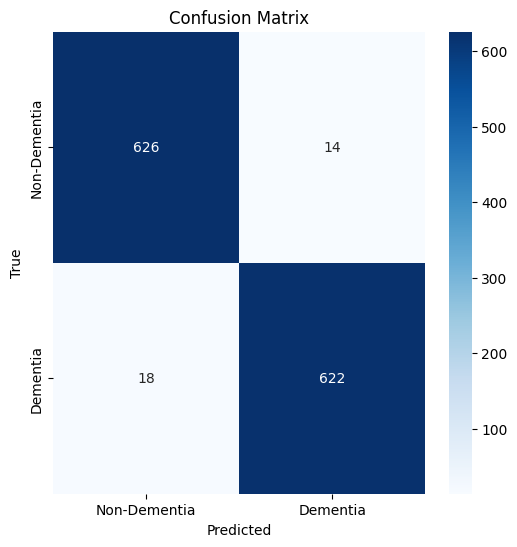

Running experiment 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


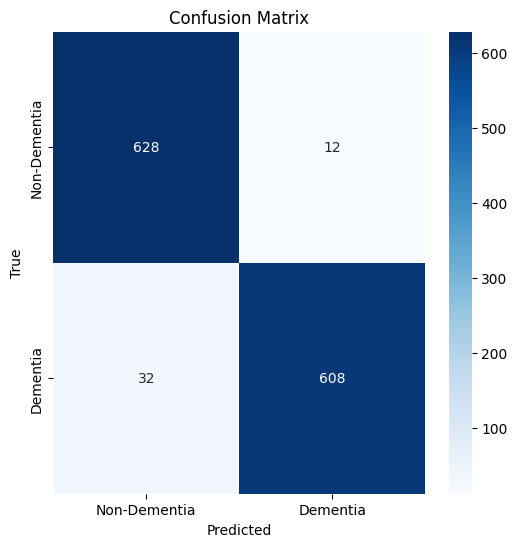

Running experiment 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


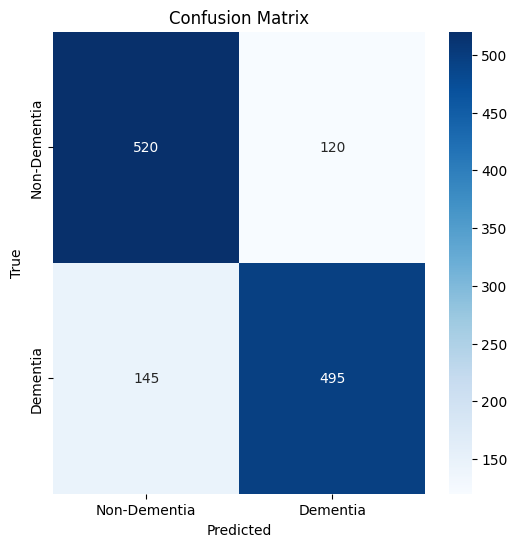


Final Metrics (Mean ± Std):
Accuracy: 0.9112 ± 0.0837
Loss: 0.2080 ± 0.1664
ROC AUC: 0.9549 ± 0.0589
Precision: 0.9212 ± 0.0822
Recall: 0.8984 ± 0.0888
F1 Score: 0.9096 ± 0.0855
MCC: 0.8227 ± 0.1673


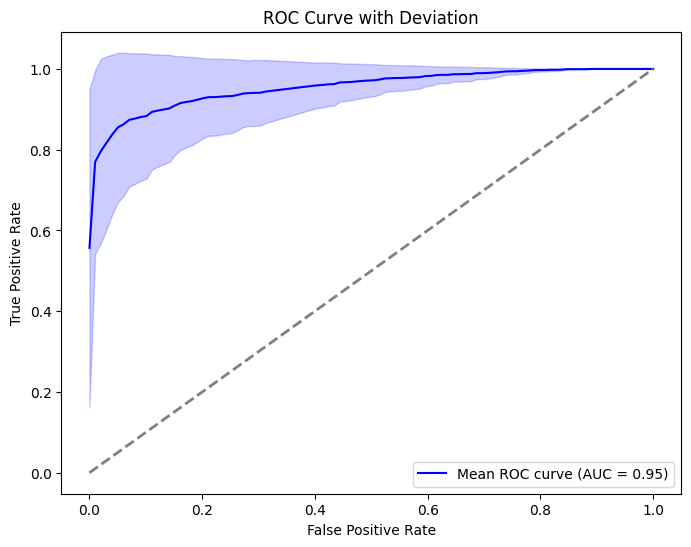

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns


def build_model():
    model = keras.models.Sequential()

    # First Conv2D layer
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D layer
    model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Conv2D layer
    model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(keras.layers.Flatten())

    # Fully connected layer
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # sigmoid for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model on a single train-test split
def train_and_evaluate(X, y, test_size=0.2, random_state=None):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Build the model
    model = build_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        batch_size=32,
        verbose=0
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype('int32')  # Apply threshold for binary classification

    # Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dementia', 'Dementia'], yticklabels=['Non-Dementia', 'Dementia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute additional metrics
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    mcc = matthews_corrcoef(y_test, y_pred_class)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'fpr': fpr,
        'tpr': tpr
    }

# Perform triplicate experiments
def triplicate_experiments(X, y, test_size=0.2):
    results = []
    for i in range(3):
        print(f"Running experiment {i + 1}...")
        result = train_and_evaluate(X, y, test_size=test_size, random_state=i)
        results.append(result)

    # Aggregate metrics
    accuracies = [r['accuracy'] for r in results]
    losses = [r['loss'] for r in results]
    roc_aucs = [r['roc_auc'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1_scores = [r['f1'] for r in results]
    mcc_scores = [r['mcc'] for r in results]

    print("\nFinal Metrics (Mean ± Std):")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")

    # Plot ROC curve with deviation shadow
    plot_roc_curve(results)

# Plot ROC curve with deviation shadow
def plot_roc_curve(results):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve and fill the shaded region for deviation
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)
    std_tpr = np.std([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean([r["roc_auc"] for r in results]):.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Deviation')
    plt.legend(loc='lower right')
    plt.show()


triplicate_experiments(Images, Classes, test_size=0.2)


# Experiment 2: Transfer Learning with Desnet

In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Running experiment 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


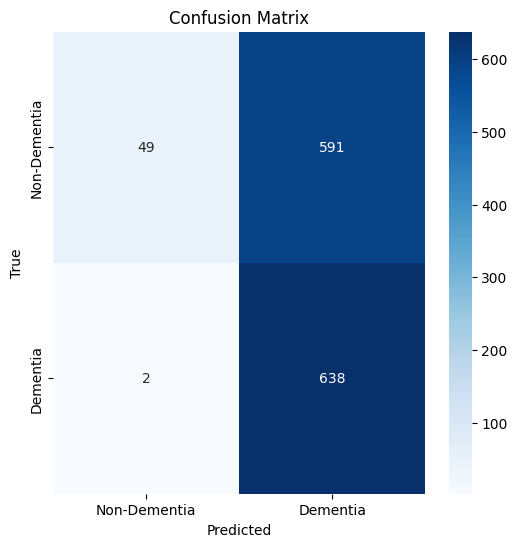

Running experiment 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


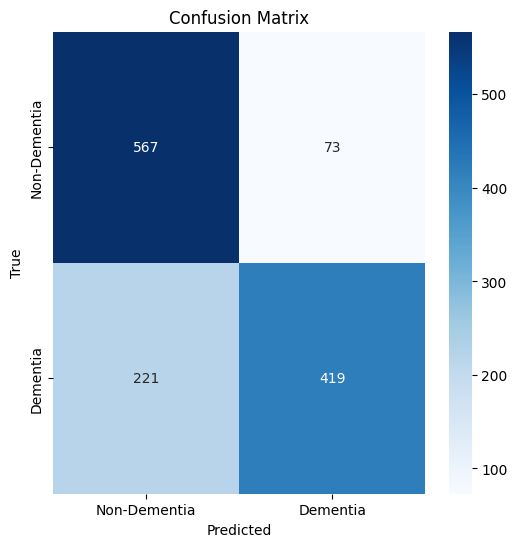

Running experiment 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


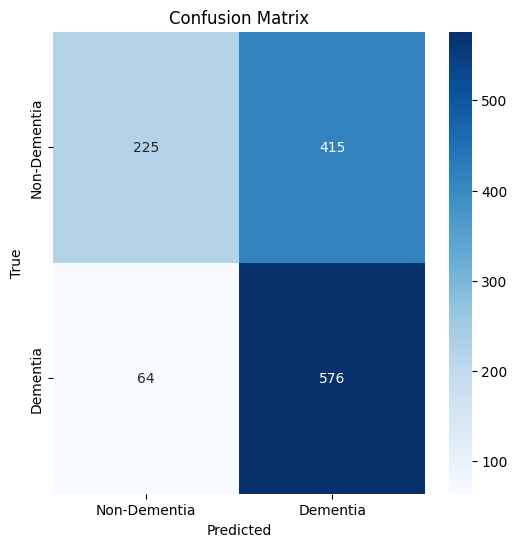


Final Metrics (Mean ± Std):
Accuracy: 0.6443 ± 0.0963
Loss: 0.6810 ± 0.1545
ROC AUC: 0.7706 ± 0.0939
Precision: 0.6507 ± 0.1443
Recall: 0.8505 ± 0.1440
F1 Score: 0.7098 ± 0.0236
MCC: 0.3481 ± 0.1539


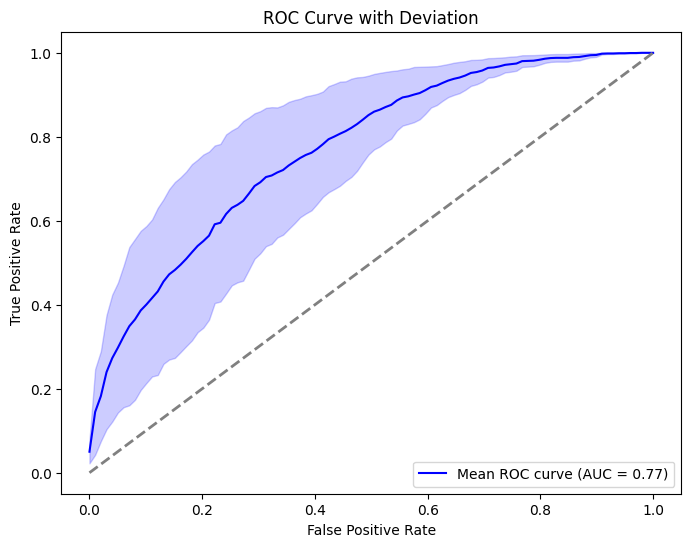

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

# Define the DenseNet model
def build_model():
    model = keras.models.Sequential()

    # Input Layer
    model.add(keras.layers.InputLayer(input_shape=(100, 100, 3)))

    # DenseNet-like Architecture using Keras DenseNet
    model.add(keras.applications.DenseNet121(
        include_top=False,  # Exclude the fully connected layers at the top
        weights=None,  # No pre-trained weights
        input_shape=(100, 100, 3)
    ))

    # Global Average Pooling layer
    model.add(keras.layers.GlobalAveragePooling2D())

    # Fully connected layer with Dropout
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model on a single train-test split
def train_and_evaluate(X, y, test_size=0.2, random_state=None):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Build the model
    model = build_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        batch_size=32,
        verbose=0
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype('int32')  # Apply threshold for binary classification

    # Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dementia', 'Dementia'], yticklabels=['Non-Dementia', 'Dementia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute additional metrics
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    mcc = matthews_corrcoef(y_test, y_pred_class)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'fpr': fpr,
        'tpr': tpr
    }

# Perform triplicate experiments
def triplicate_experiments(X, y, test_size=0.2):
    results = []
    for i in range(3):
        print(f"Running experiment {i + 1}...")
        result = train_and_evaluate(X, y, test_size=test_size, random_state=i)
        results.append(result)

    # Aggregate metrics
    accuracies = [r['accuracy'] for r in results]
    losses = [r['loss'] for r in results]
    roc_aucs = [r['roc_auc'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1_scores = [r['f1'] for r in results]
    mcc_scores = [r['mcc'] for r in results]

    print("\nFinal Metrics (Mean ± Std):")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")

    # Plot ROC curve with deviation shadow
    plot_roc_curve(results)

# Plot ROC curve with deviation shadow
def plot_roc_curve(results):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve and fill the shaded region for deviation
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)
    std_tpr = np.std([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean([r["roc_auc"] for r in results]):.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Deviation')
    plt.legend(loc='lower right')
    plt.show()

triplicate_experiments(Images, Classes, test_size=0.2)


# Experiment 3: Transfer learning with ResNet50

In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Running experiment 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


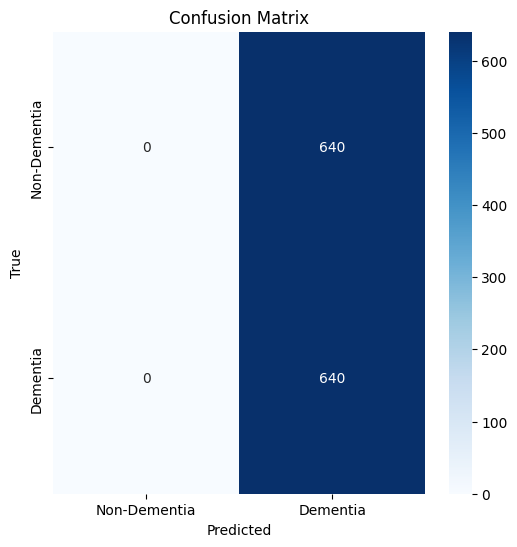

Running experiment 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


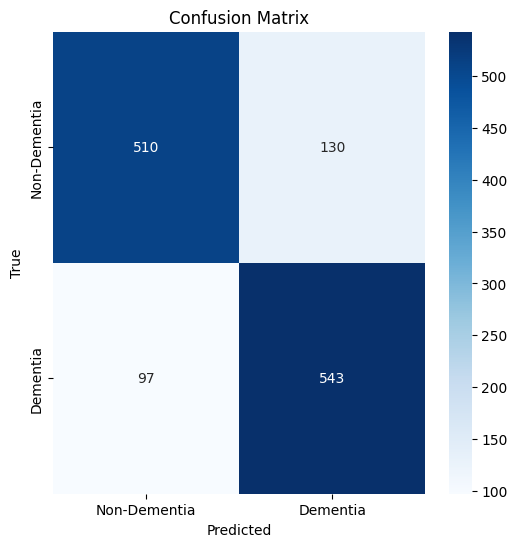

Running experiment 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


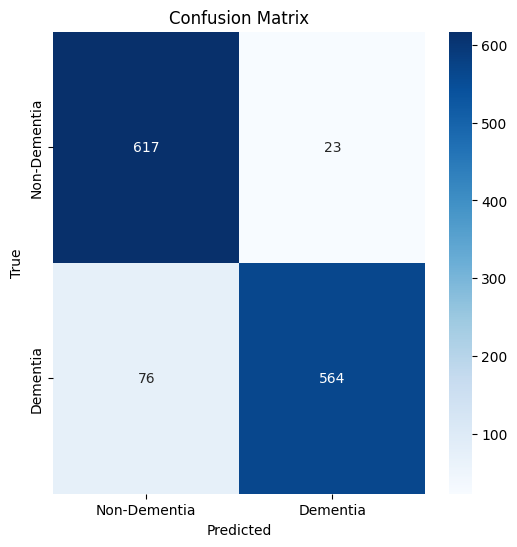


Final Metrics (Mean ± Std):
Accuracy: 0.7484 ± 0.1804
Loss: 0.4590 ± 0.2251
ROC AUC: 0.7869 ± 0.2318
Precision: 0.7559 ± 0.1915
Recall: 0.9099 ± 0.0651
F1 Score: 0.8044 ± 0.1044
MCC: 0.4981 ± 0.3618


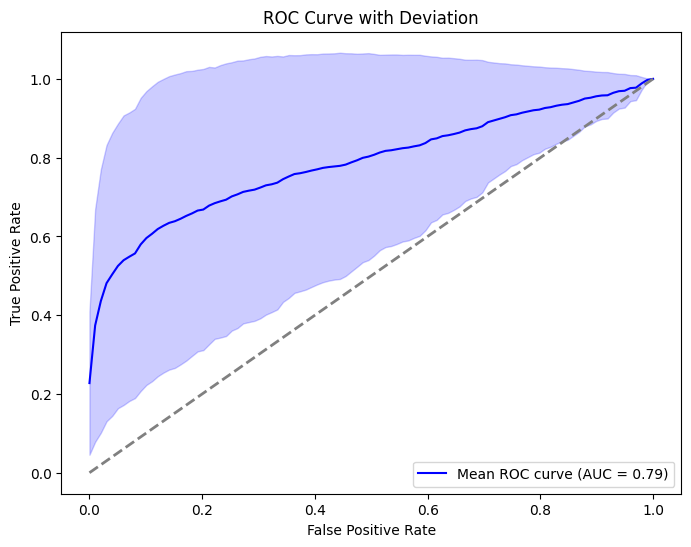

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

def build_model():
    model = keras.models.Sequential()

    # Input Layer
    model.add(keras.layers.InputLayer(input_shape=(100, 100, 3)))

    # ResNet-like Architecture using Keras ResNet50
    model.add(keras.applications.ResNet50(
        include_top=False,  # Exclude the fully connected layers at the top
        weights=None,  # No pre-trained weights
        input_shape=(100, 100, 3)
    ))

    # Global Average Pooling layer
    model.add(keras.layers.GlobalAveragePooling2D())

    # Fully connected layer with Dropout
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model on a single train-test split
def train_and_evaluate(X, y, test_size=0.2, random_state=None):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Build the model
    model = build_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        batch_size=32,
        verbose=0
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype('int32')  # Apply threshold for binary classification

    # Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dementia', 'Dementia'], yticklabels=['Non-Dementia', 'Dementia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute additional metrics
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    mcc = matthews_corrcoef(y_test, y_pred_class)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'fpr': fpr,
        'tpr': tpr
    }

# Perform triplicate experiments
def triplicate_experiments(X, y, test_size=0.2):
    results = []
    for i in range(3):
        print(f"Running experiment {i + 1}...")
        result = train_and_evaluate(X, y, test_size=test_size, random_state=i)
        results.append(result)

    # Aggregate metrics
    accuracies = [r['accuracy'] for r in results]
    losses = [r['loss'] for r in results]
    roc_aucs = [r['roc_auc'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1_scores = [r['f1'] for r in results]
    mcc_scores = [r['mcc'] for r in results]

    print("\nFinal Metrics (Mean ± Std):")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")

    # Plot ROC curve with deviation shadow
    plot_roc_curve(results)

# Plot ROC curve with deviation shadow
def plot_roc_curve(results):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve and fill the shaded region for deviation
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)
    std_tpr = np.std([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean([r["roc_auc"] for r in results]):.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Deviation')
    plt.legend(loc='lower right')
    plt.show()

triplicate_experiments(Images, Classes, test_size=0.2)


# Experiment 4: Transfer learning with VGG16

In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Running experiment 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


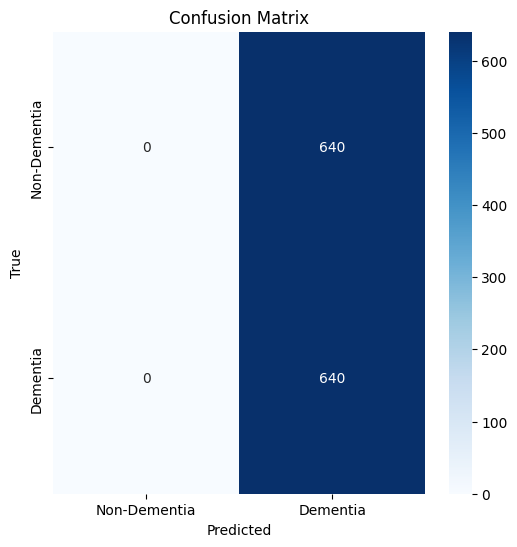

Running experiment 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


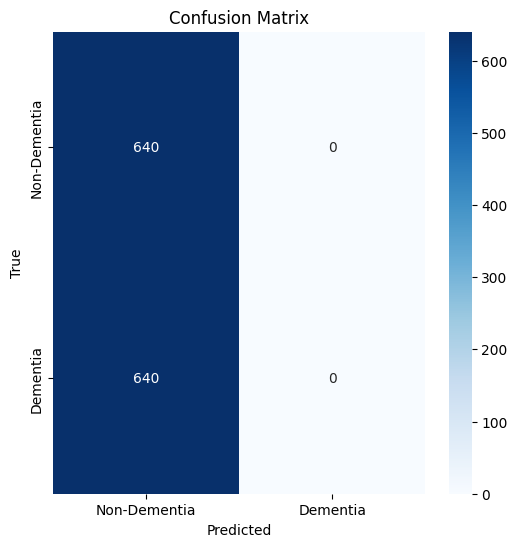

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running experiment 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


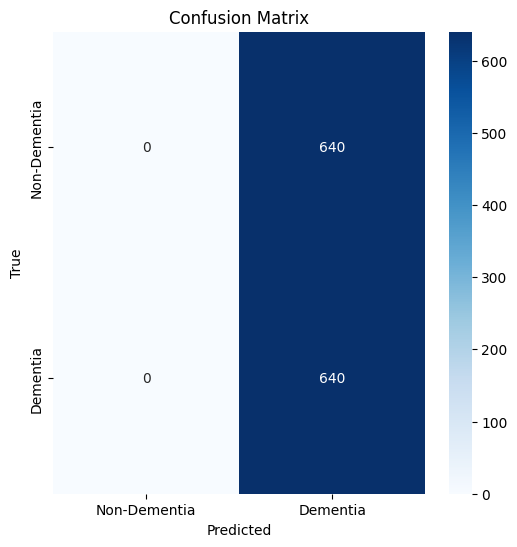


Final Metrics (Mean ± Std):
Accuracy: 0.5000 ± 0.0000
Loss: 0.6932 ± 0.0000
ROC AUC: 0.5000 ± 0.0000
Precision: 0.3333 ± 0.2357
Recall: 0.6667 ± 0.4714
F1 Score: 0.4444 ± 0.3143
MCC: 0.0000 ± 0.0000


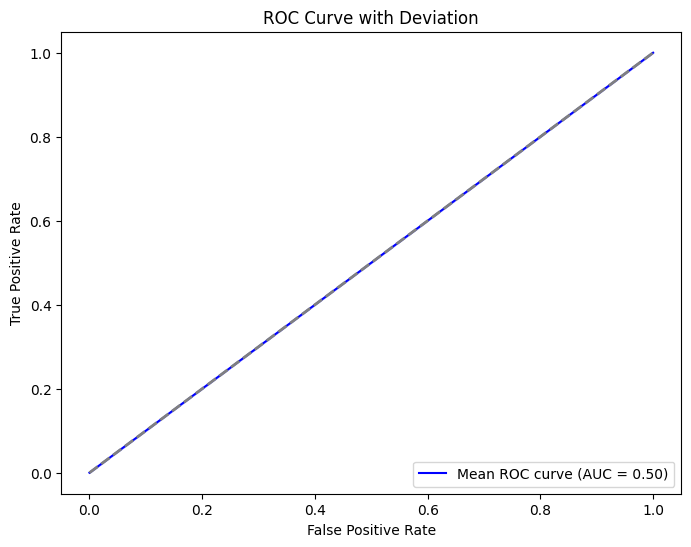

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

# Define the VGG16 model
def build_model():
    model = keras.models.Sequential()

    # Input Layer
    model.add(keras.layers.InputLayer(input_shape=(100, 100, 3)))

    # VGG16 Architecture using Keras VGG16
    model.add(keras.applications.VGG16(
        include_top=False,  # Exclude the fully connected layers at the top
        weights=None,  # No pre-trained weights, train from scratch
        input_shape=(100, 100, 3)
    ))

    # Global Average Pooling layer
    model.add(keras.layers.GlobalAveragePooling2D())

    # Fully connected layer with Dropout
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model on a single train-test split
def train_and_evaluate(X, y, test_size=0.2, random_state=None):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Build the model
    model = build_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        batch_size=32,
        verbose=0
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype('int32')  # Apply threshold for binary classification

    # Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dementia', 'Dementia'], yticklabels=['Non-Dementia', 'Dementia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute additional metrics
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    mcc = matthews_corrcoef(y_test, y_pred_class)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'fpr': fpr,
        'tpr': tpr
    }

# Perform triplicate experiments
def triplicate_experiments(X, y, test_size=0.2):
    results = []
    for i in range(3):
        print(f"Running experiment {i + 1}...")
        result = train_and_evaluate(X, y, test_size=test_size, random_state=i)
        results.append(result)

    # Aggregate metrics
    accuracies = [r['accuracy'] for r in results]
    losses = [r['loss'] for r in results]
    roc_aucs = [r['roc_auc'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1_scores = [r['f1'] for r in results]
    mcc_scores = [r['mcc'] for r in results]

    print("\nFinal Metrics (Mean ± Std):")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")

    # Plot ROC curve with deviation shadow
    plot_roc_curve(results)

# Plot ROC curve with deviation shadow
def plot_roc_curve(results):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve and fill the shaded region for deviation
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)
    std_tpr = np.std([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean([r["roc_auc"] for r in results]):.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Deviation')
    plt.legend(loc='lower right')
    plt.show()

triplicate_experiments(Images, Classes, test_size=0.2)


# Experiment 5: CNN with attention head

In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Running experiment 1...
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


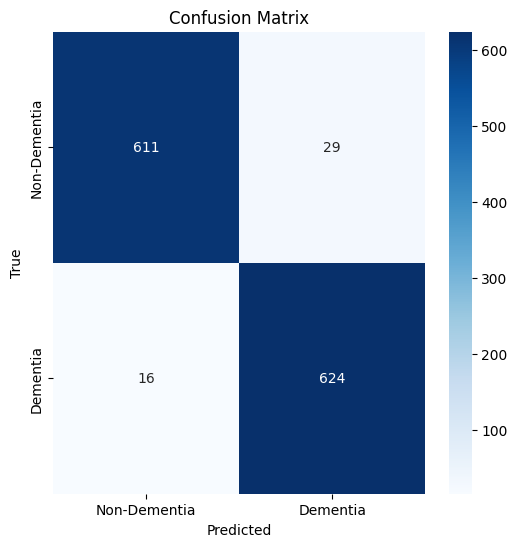

Running experiment 2...
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


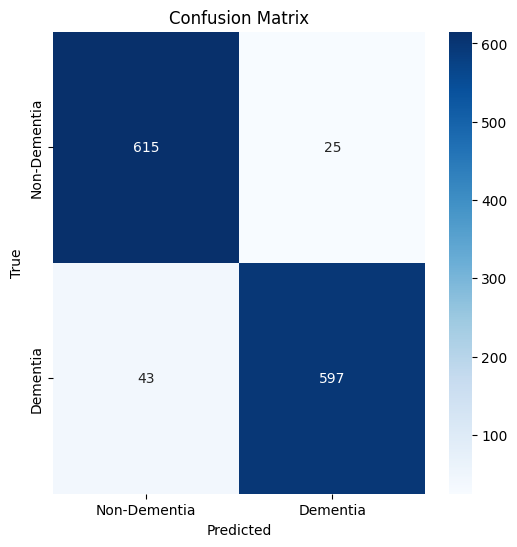

Running experiment 3...
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


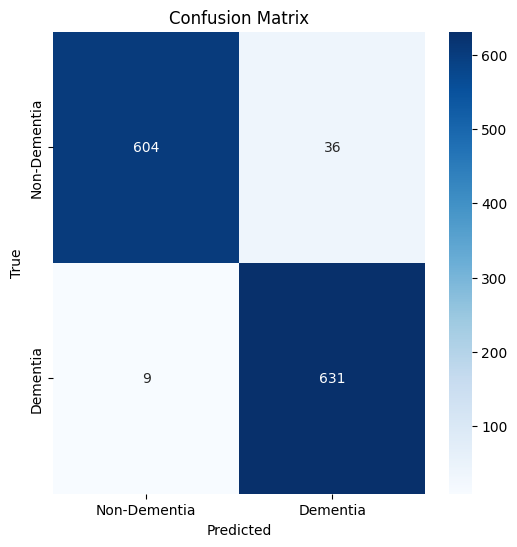


Final Metrics (Mean ± Std):
Accuracy: 0.9589 ± 0.0085
Loss: 0.1141 ± 0.0161
ROC AUC: 0.9932 ± 0.0025
Precision: 0.9538 ± 0.0058
Recall: 0.9646 ± 0.0229
F1 Score: 0.9590 ± 0.0091
MCC: 0.9182 ± 0.0170


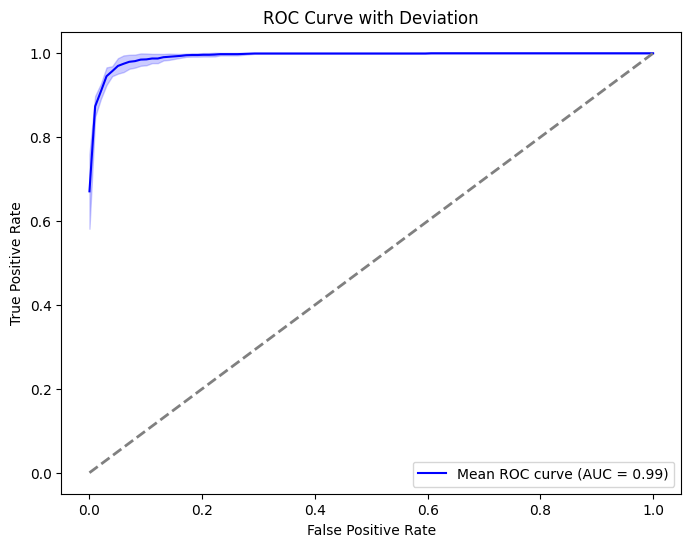

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

# Define the model building function with attention using the Functional API
def build_model():
    inputs = keras.Input(shape=(100, 100, 3))

    # First Conv2D layer
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Second Conv2D layer
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Third Conv2D layer
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Attention Layer (after the last convolutional layer)
    attention = keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(x)
    x = keras.layers.multiply([x, attention])

    # Flatten the output after attention
    x = keras.layers.Flatten()(x)

    # Fully connected layer
    x = keras.layers.Dense(512, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)

    # Output layer
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)  # Use sigmoid for binary classification

    # Create the model
    model = keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model on a single train-test split
def train_and_evaluate(X, y, test_size=0.2, random_state=None):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Build the model
    model = build_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        batch_size=32,
        verbose=0
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype('int32')  # Apply threshold for binary classification

    # Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dementia', 'Dementia'], yticklabels=['Non-Dementia', 'Dementia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute additional metrics
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    mcc = matthews_corrcoef(y_test, y_pred_class)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'fpr': fpr,
        'tpr': tpr
    }

# Perform triplicate experiments
def triplicate_experiments(X, y, test_size=0.2):
    results = []
    for i in range(3):
        print(f"Running experiment {i + 1}...")
        result = train_and_evaluate(X, y, test_size=test_size, random_state=i)
        results.append(result)

    # Aggregate metrics
    accuracies = [r['accuracy'] for r in results]
    losses = [r['loss'] for r in results]
    roc_aucs = [r['roc_auc'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1_scores = [r['f1'] for r in results]
    mcc_scores = [r['mcc'] for r in results]

    print("\nFinal Metrics (Mean ± Std):")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")

    # Plot ROC curve with deviation shadow
    plot_roc_curve(results)

# Plot ROC curve with deviation shadow
def plot_roc_curve(results):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve and fill the shaded region for deviation
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)
    std_tpr = np.std([np.interp(mean_fpr, r['fpr'], r['tpr']) for r in results], axis=0)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean([r["roc_auc"] for r in results]):.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Deviation')
    plt.legend(loc='lower right')
    plt.show()

# Example usage
triplicate_experiments(Images, Classes, test_size=0.2)


# Explainable artificial intelligence with attention map visualization

In [ ]:
import keras
import tensorflow as tf

# Clear Keras session
keras.backend.clear_session()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 100, 100, 64)   │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 100, 100, 64)   │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 50, 50, 64)     │              0 │ batch_normalization_9… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 50, 50, 128)    │         73,856 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 50, 50, 128)    │            512 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 25, 25, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 25, 25, 1)      │            129 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_3 (Multiply)     │ (None, 25, 25, 128)    │              0 │ max_pooling2d_10[0][0… │
│                           │                        │                │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 80000)          │              0 │ multiply_3[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │     10,240,128 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            129 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,316,802 (39.36 MB)

 Trainable params: 10,316,418 (39.35 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - dense_7_accuracy: 0.5266 - loss: 6.8298 - val_dense_7_accuracy: 0.5000 - val_loss: 0.7183
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - dense_7_accuracy: 0.6359 - loss: 0.7465 - val_dense_7_accuracy: 0.5000 - val_loss: 0.7354
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - dense_7_accuracy: 0.5531 - loss: 0.6456 - val_dense_7_accuracy: 0.5000 - val_loss: 1.3492
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - dense_7_accuracy: 0.5773 - loss: 0.6404 - val_dense_7_accuracy: 0.5000 - val_loss: 2.2586
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - dense_7_accuracy: 0.7367 - loss: 0.5945 - val_dense_7_accuracy: 0.5000 - val_loss: 3.3507
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - dense_7_accuracy: 0.8961 - loss: 0.4943 - val_dense_7_accuracy: 0.5000 - val_loss: 4.5454
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - dense_7_accuracy: 0.9055 - loss: 0.3479 - val_dense_7_accuracy: 0.5000 - val_loss: 5.6281
Epoch 8/50
3/3

<ipython-input-37-f8bb931b9691>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(np.round(prediction[0]))]  # Round to get 0 or 1


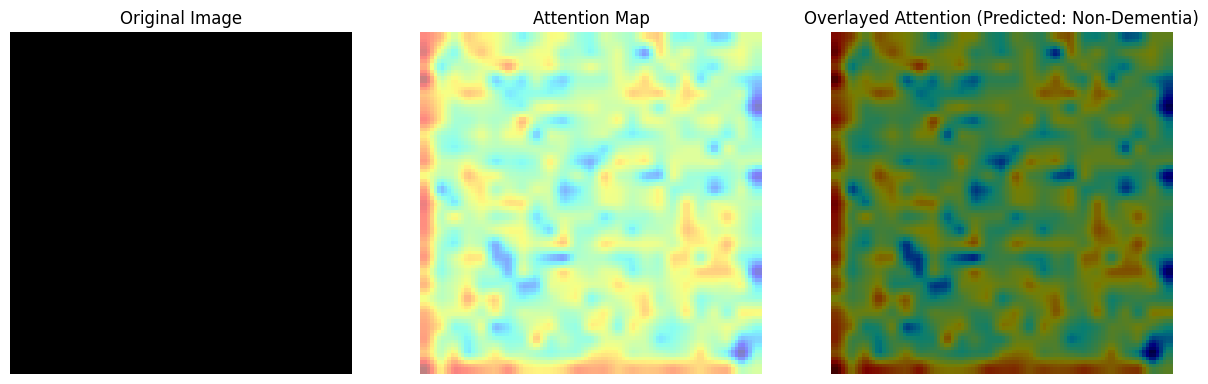

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


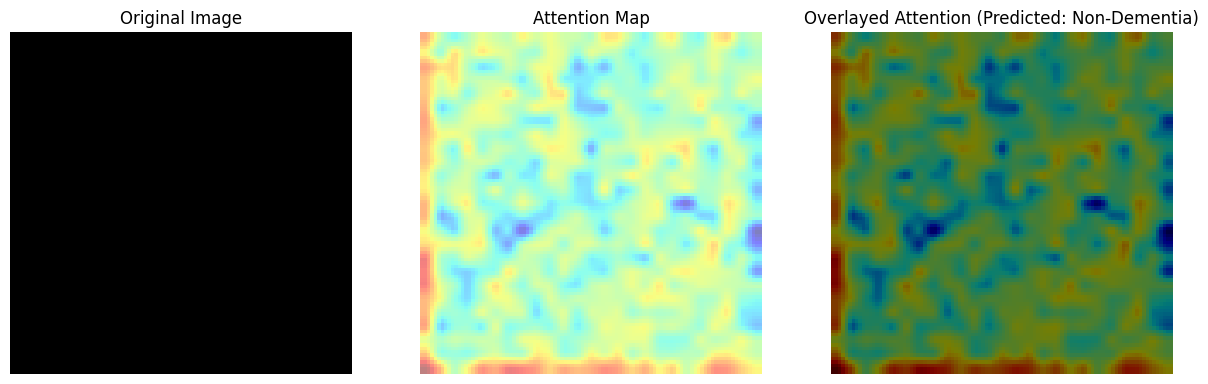

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


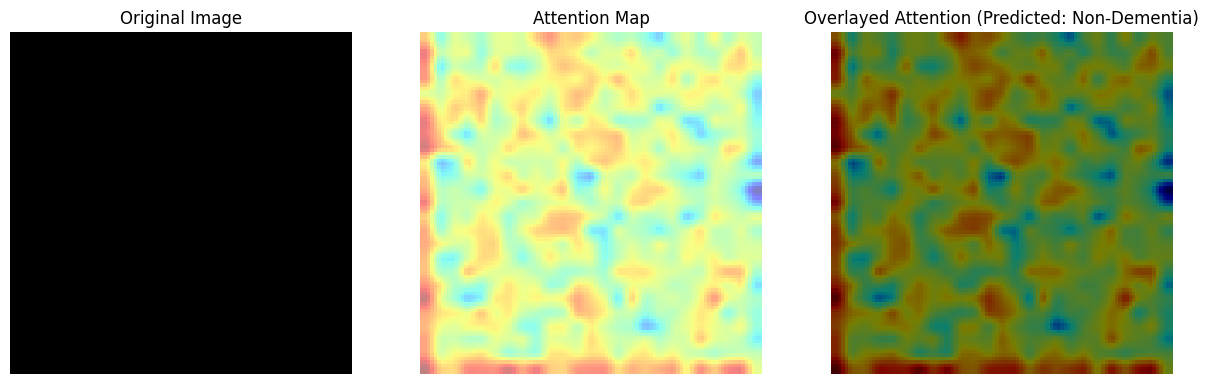

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


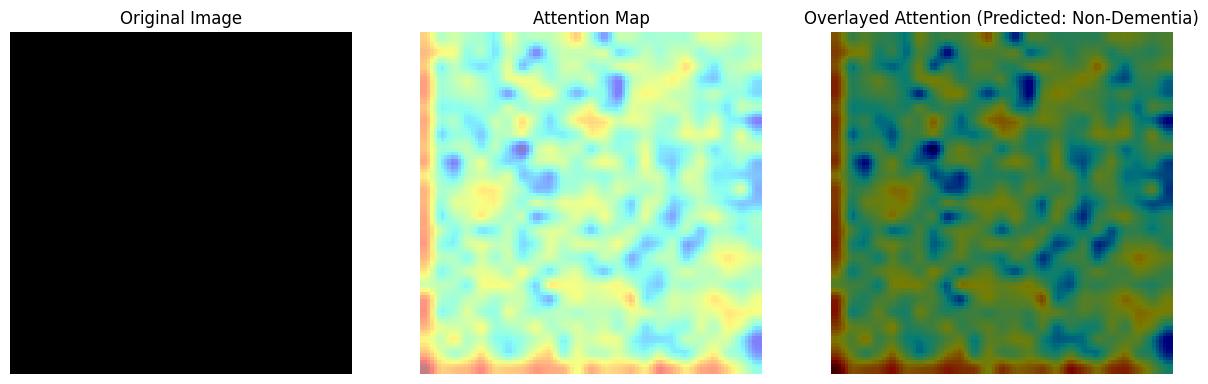

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


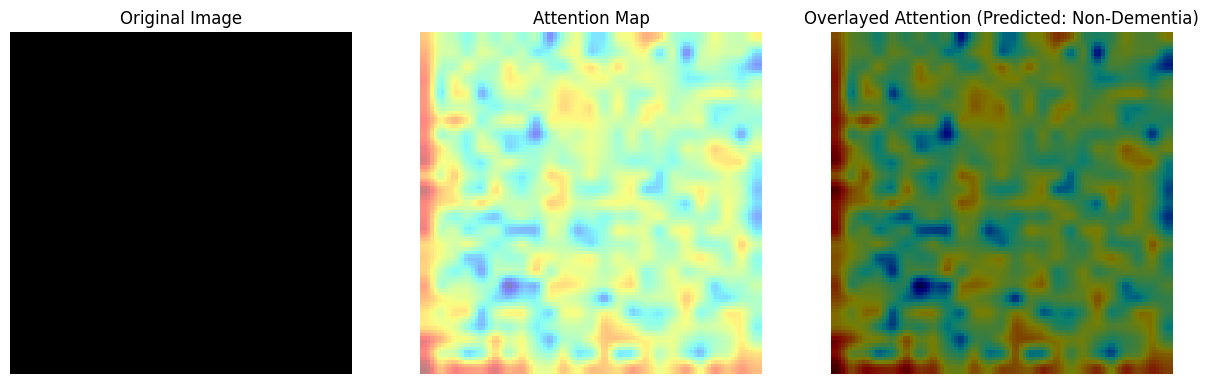

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


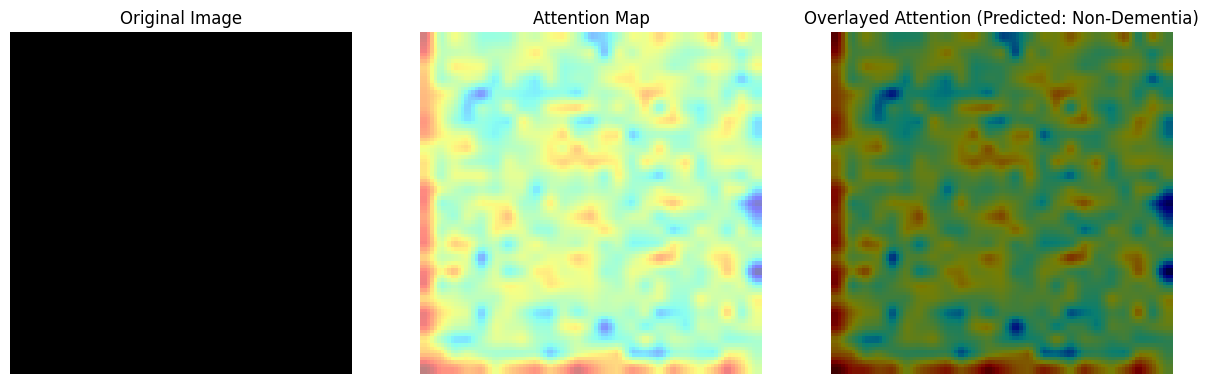

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


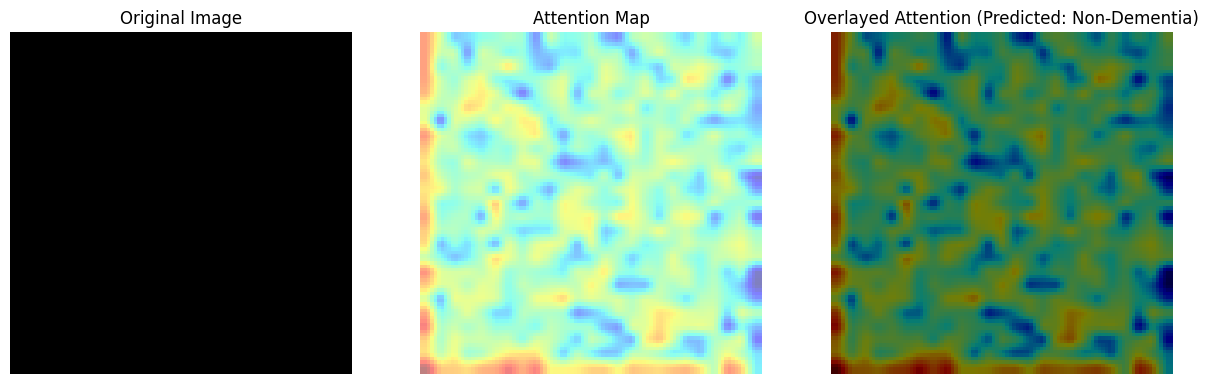

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


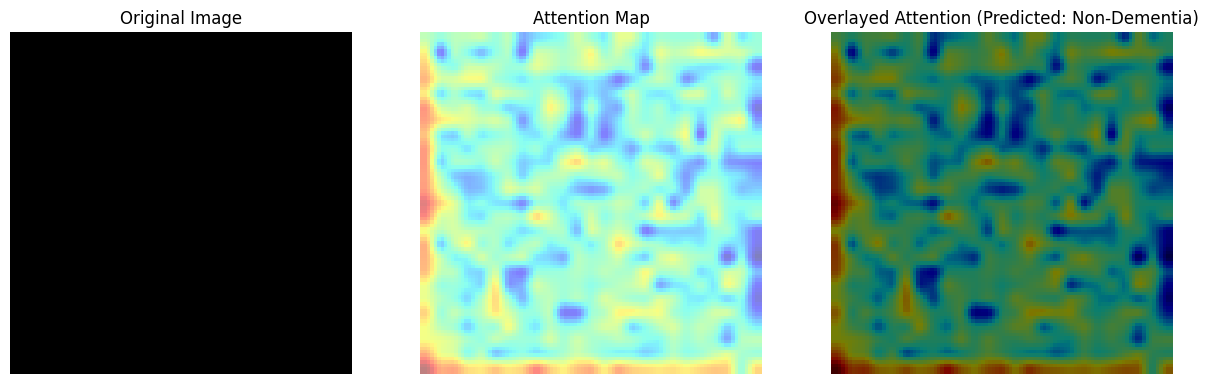

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


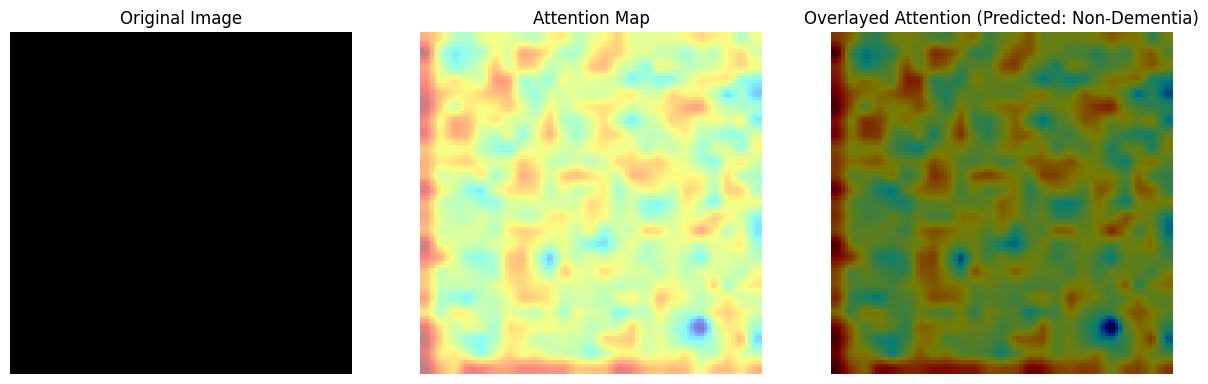

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


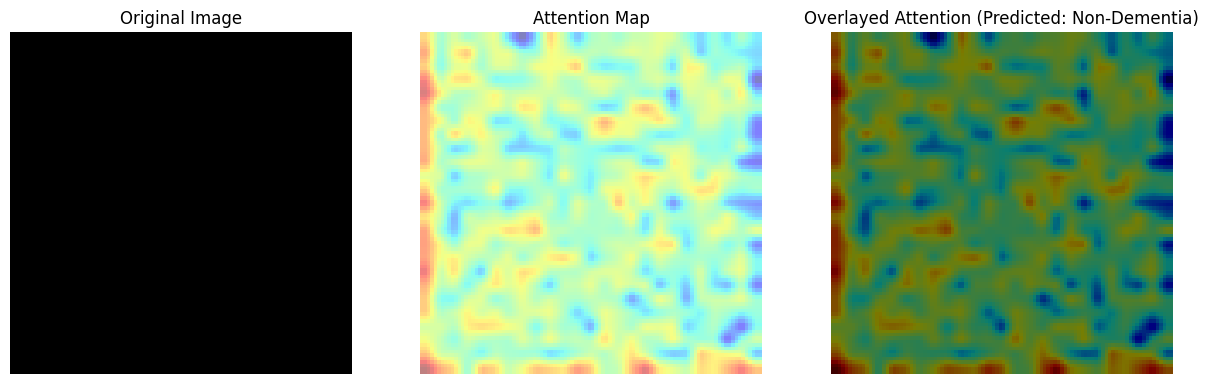

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Define a model with an attention layer for binary classification
def build_model_with_attention_output():
    inputs = keras.Input(shape=(100, 100, 3))

    # Convolutional layers
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Attention Map
    attention = keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(x)
    x = keras.layers.multiply([x, attention])

    # Flatten for Dense Layers
    x = keras.layers.Flatten()(x)

    # Dense Layers
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)  # Binary output (sigmoid)

    # Model
    model = keras.Model(inputs, [outputs, attention])

    model.summary()

    # Compile the model for binary classification
    model.compile(optimizer='adam',
                  loss=['binary_crossentropy', 'mean_squared_error'],
                  metrics=['accuracy', 'mean_squared_error'])  # Use accuracy as metric

    return model


# Build and train the model
model = build_model_with_attention_output()
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


# Function to visualize attention maps
def visualize_attention(images, model, class_labels):
    for img in images:
        img_input = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction, attention_map = model.predict(img_input)

        # Resize attention map to match the original image size
        attention_map_resized = tf.image.resize(attention_map[0], (100, 100)).numpy()

        # Plotting
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img.astype('uint8'))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(attention_map_resized, cmap='jet', alpha=0.5)  # Display attention
        plt.title("Attention Map")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(img.astype('uint8'))
        plt.imshow(attention_map_resized, cmap='jet', alpha=0.5)  # Overlay attention
        predicted_class = class_labels[int(np.round(prediction[0]))]  # Round to get 0 or 1
        plt.title(f"Overlayed Attention (Predicted: {predicted_class})")
        plt.axis('off')

        plt.show()


class_images = [X_test[i] for i in range(10)]

# Binary class labels for dementia and non-dementia
class_labels = ["Non-Dementia", "Dementia"]

# Visualize the attention maps for these images
visualize_attention(class_images, model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


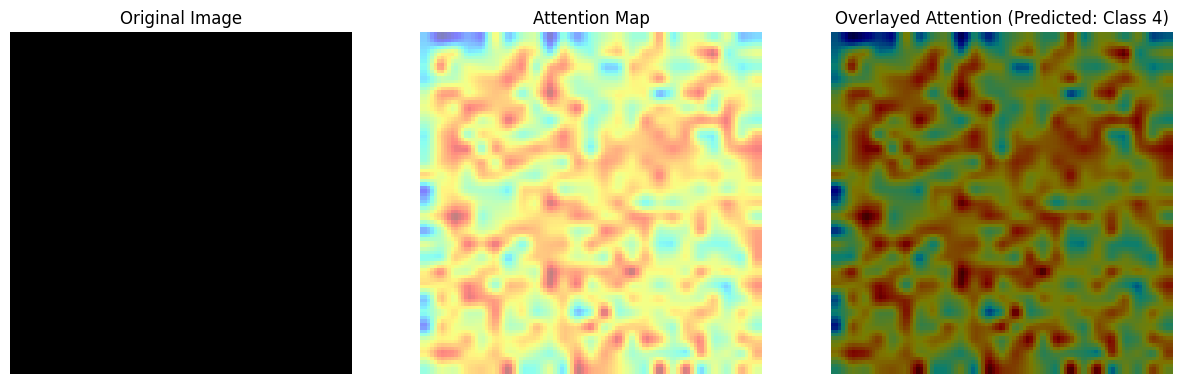

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


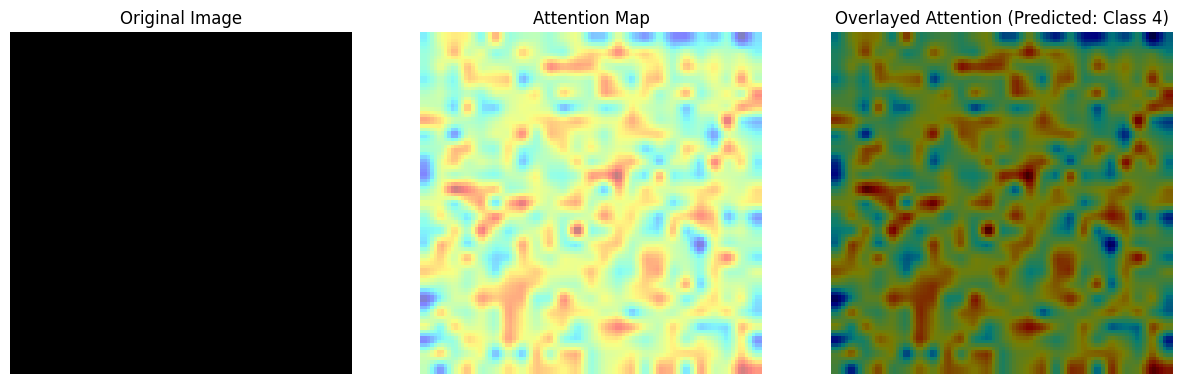

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


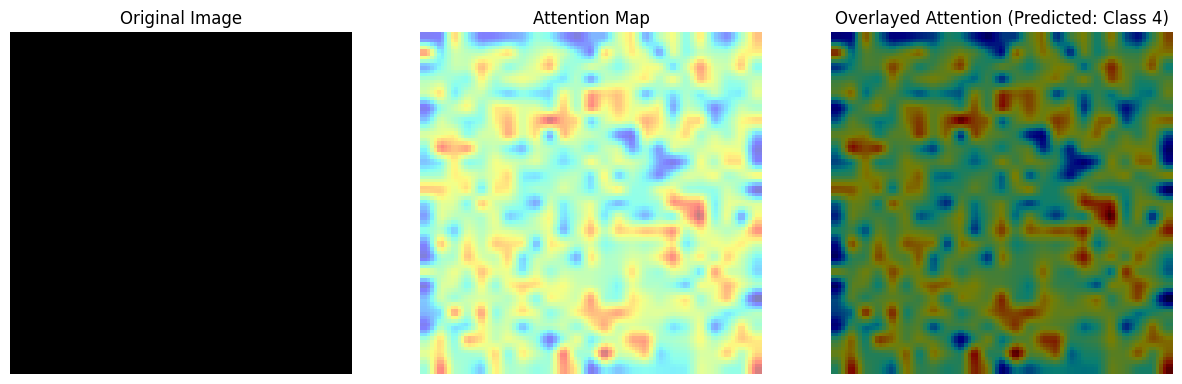

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


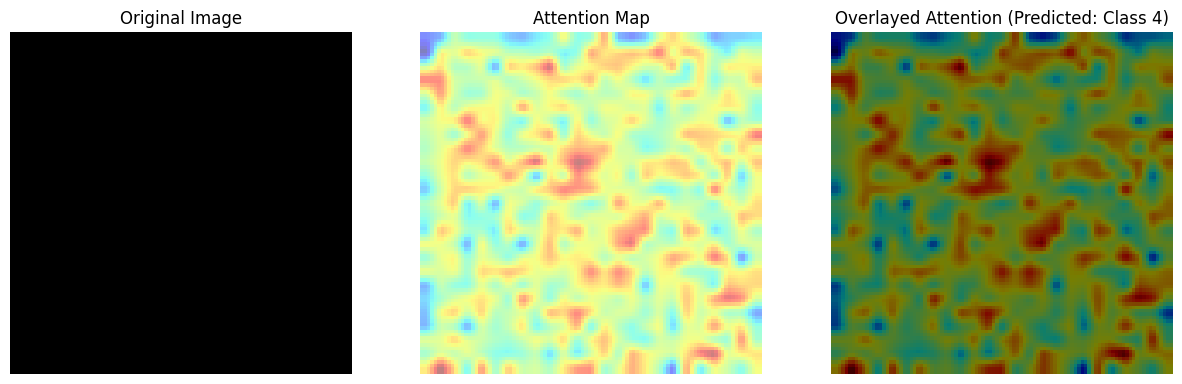

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


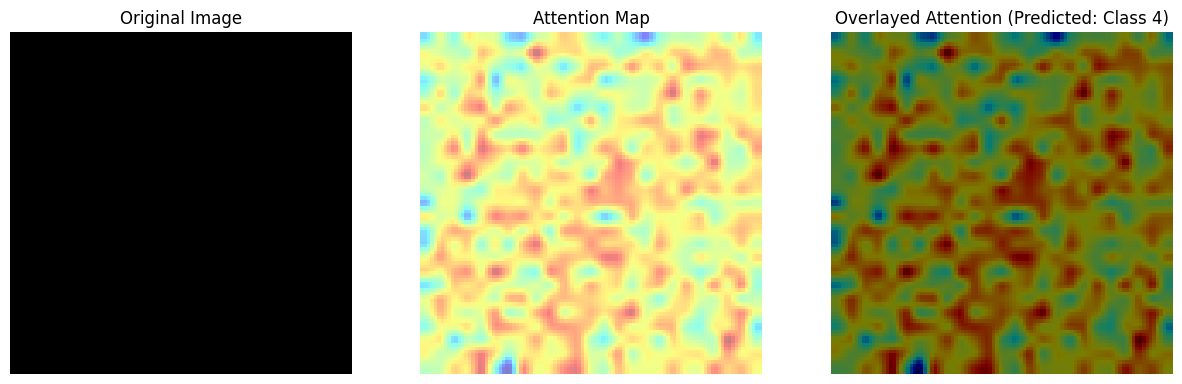

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


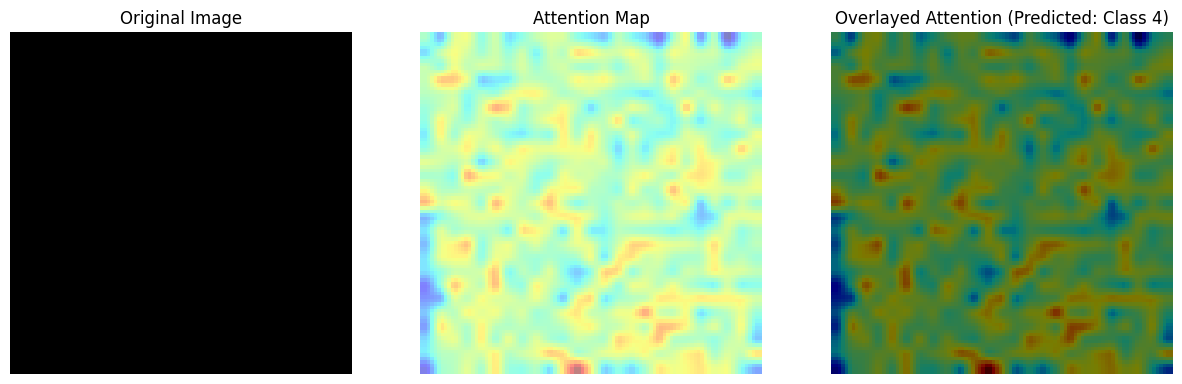

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


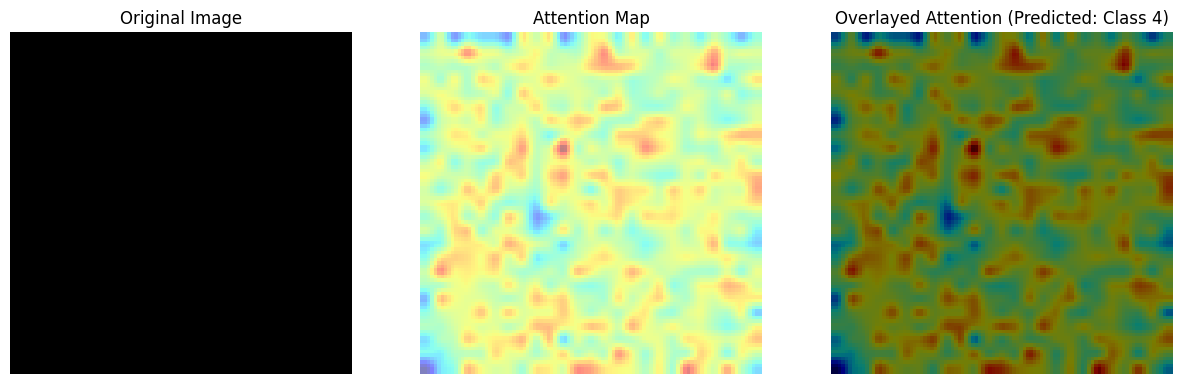

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


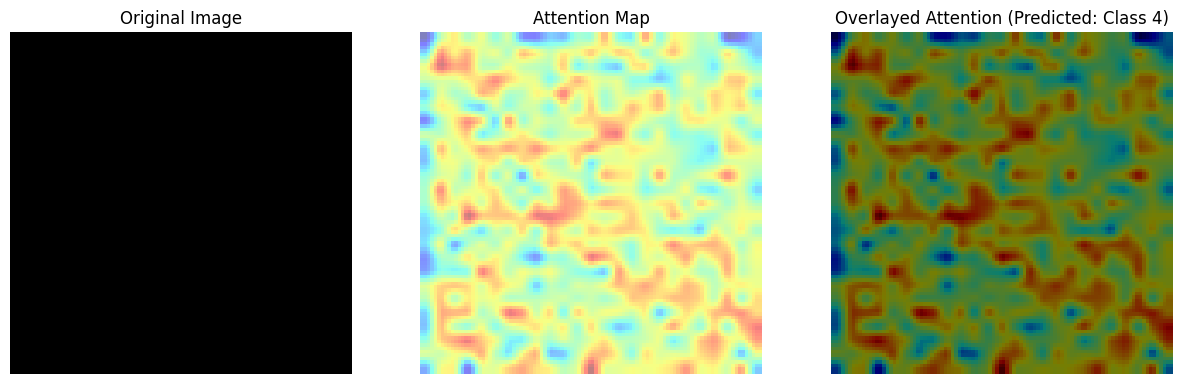

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


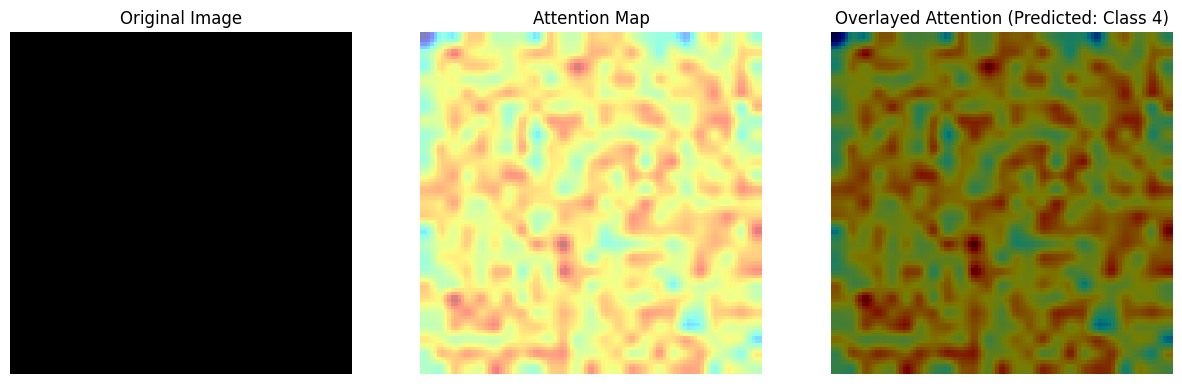

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


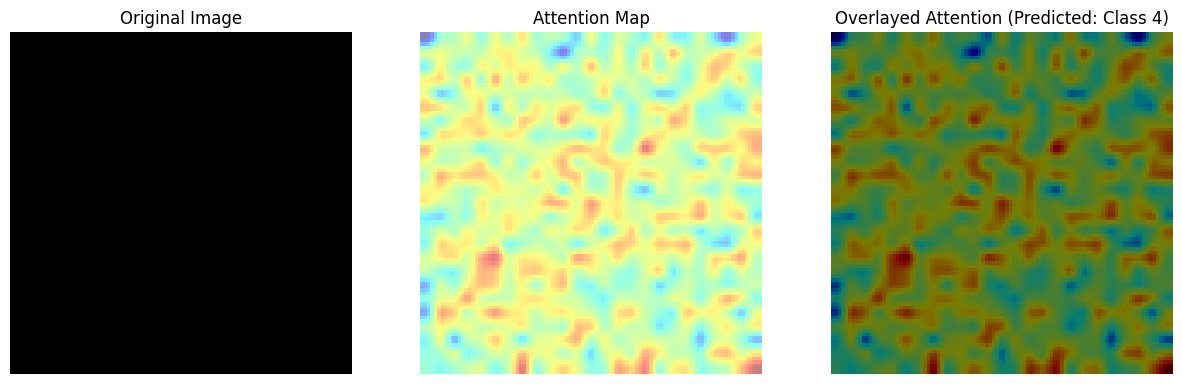

In [ ]:
class_images = [X_test[i] for i in range(10)]

class_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]  # Adjust to your classes

# Visualize the attention maps
visualize_attention(class_images, model, class_labels)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#  model with attention layer
def build_model_with_attention_output():
    inputs = keras.Input(shape=(100, 100, 3))

    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Attention Map
    attention = keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(x)
    x = keras.layers.multiply([x, attention])

    # Flatten for Dense Layers
    x = keras.layers.Flatten()(x)

    # Dense Layers
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(4, activation='softmax')(x)

    # Model
    model = keras.Model(inputs, [outputs, attention])

    model.summary()

    model.compile(optimizer='adam',
                  loss=['sparse_categorical_crossentropy', 'mean_squared_error'],
                  metrics=['accuracy', 'mean_squared_error'])  # Use general metrics

    return model


# Build and train the model
model = build_model_with_attention_output()
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Function to visualize attention maps
def visualize_attention(images, model, class_labels):
    for img in images:
        img_input = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction, attention_map = model.predict(img_input)

        # Resize attention map to match the original image size
        attention_map_resized = tf.image.resize(attention_map[0], (100, 100)).numpy()

        # Plotting
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img.astype('uint8'))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(attention_map_resized, cmap='jet', alpha=0.5)  # Display attention
        plt.title("Attention Map")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(img.astype('uint8'))
        plt.imshow(attention_map_resized, cmap='jet', alpha=0.5)  # Overlay attention
        predicted_class = class_labels[np.argmax(prediction[0])]
        plt.title(f"Overlayed Attention (Predicted: {predicted_class})")
        plt.axis('off')

        plt.show()


class_images = [X_test[i] for i in range(10)]

class_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]  # Adjust to your classes

# Visualize the attention maps
visualize_attention(class_images, model, class_labels)



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 100, 100, 64)   │          1,792 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 100, 100, 64)   │            256 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 50, 50, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 50, 50, 128)    │         73,856 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 50, 50, 128)    │            512 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 25, 25, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 25, 25, 1)      │            129 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_7 (Multiply)     │ (None, 25, 25, 128)    │              0 │ max_pooling2d_15[0][0… │
│                           │                        │                │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 80000)          │              0 │ multiply_7[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 128)            │     10,240,128 │ flatten_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 128)            │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 4)              │            516 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,317,189 (39.36 MB)

 Trainable params: 10,316,805 (39.36 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - dense_15_accuracy: 0.5225 - loss: 2.3175 - val_dense_15_accuracy: 0.6336 - val_loss: 0.9567
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - dense_15_accuracy: 0.7402 - loss: 0.5931 - val_dense_15_accuracy: 0.6367 - val_loss: 0.7926
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - dense_15_accuracy: 0.8533 - loss: 0.3586 - val_dense_15_accuracy: 0.8711 - val_loss: 0.3350
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - dense_15_accuracy: 0.9234 - loss: 0.1957 - val_dense_15_accuracy: 0.9266 - val_loss: 0.2310
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - dense_15_accuracy: 0.9543 - loss: 0.1288 - val_dense_15_accuracy: 0.8992 - val_loss: 0.3086
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - dense_15_accuracy: 0.9663 - loss: 0.0841 - val_dense_15_accuracy: 0.9117 - val_loss: 0.2756
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - dense_15_accuracy: 0.9650 - loss: 0.0937 - val_dense_15_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


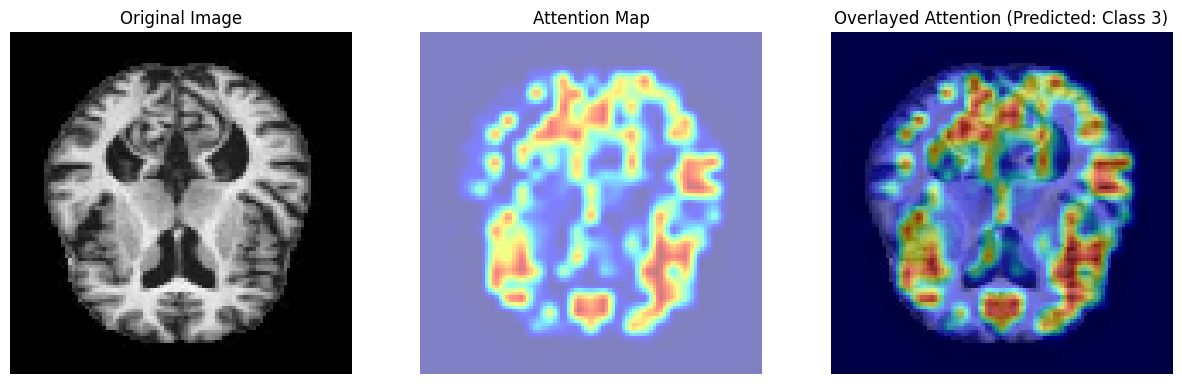

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


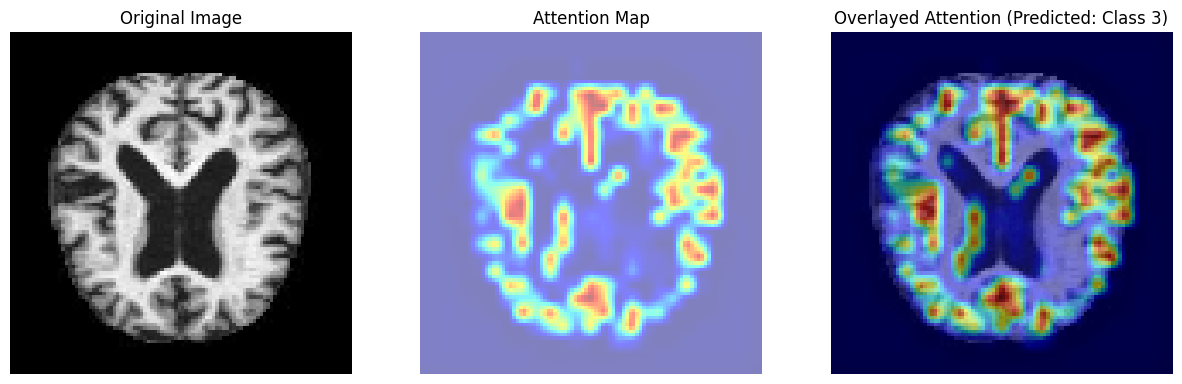

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


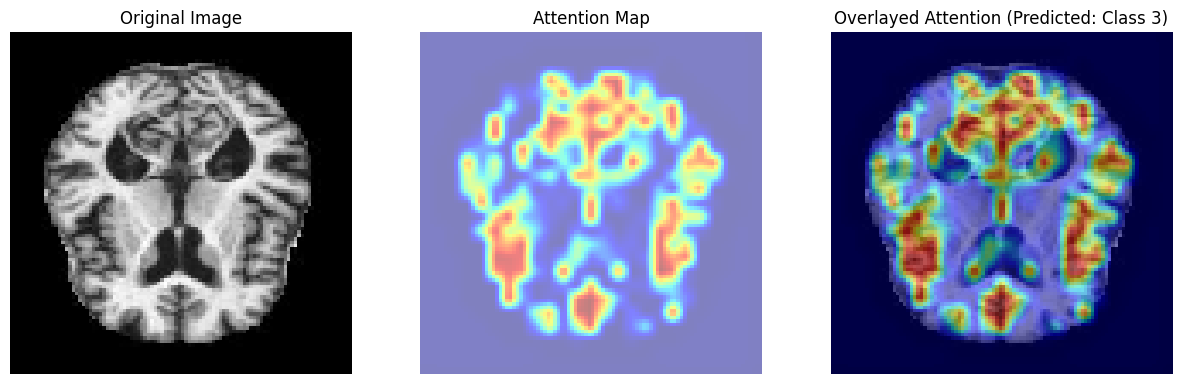

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


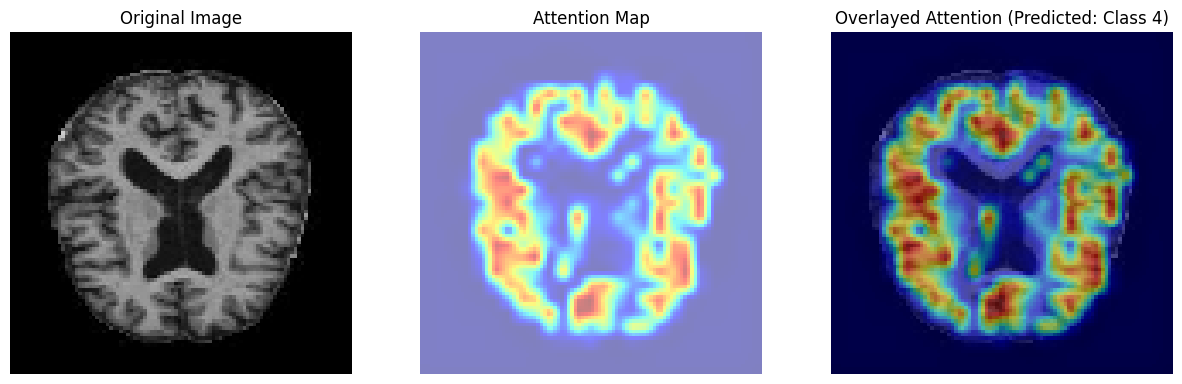

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


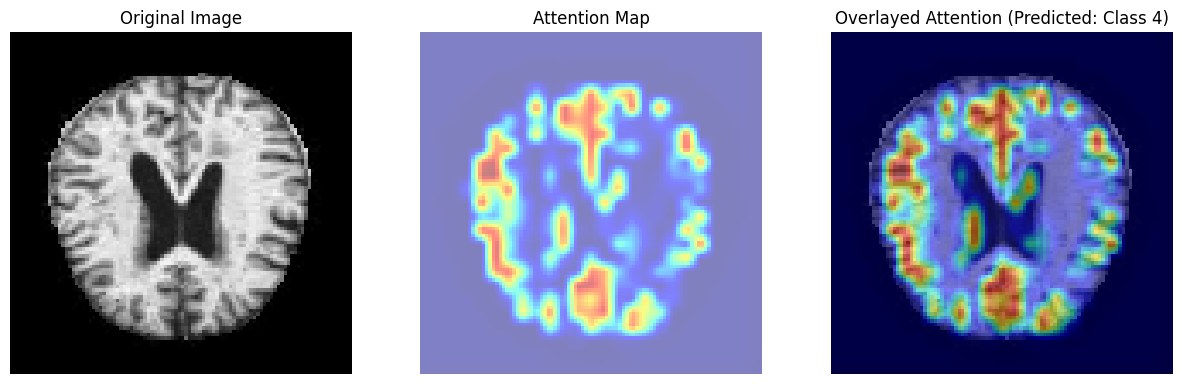

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


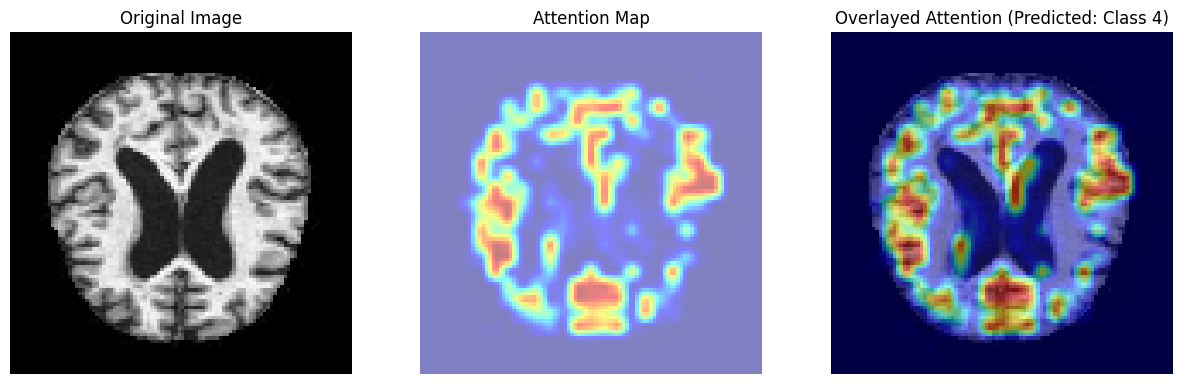

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


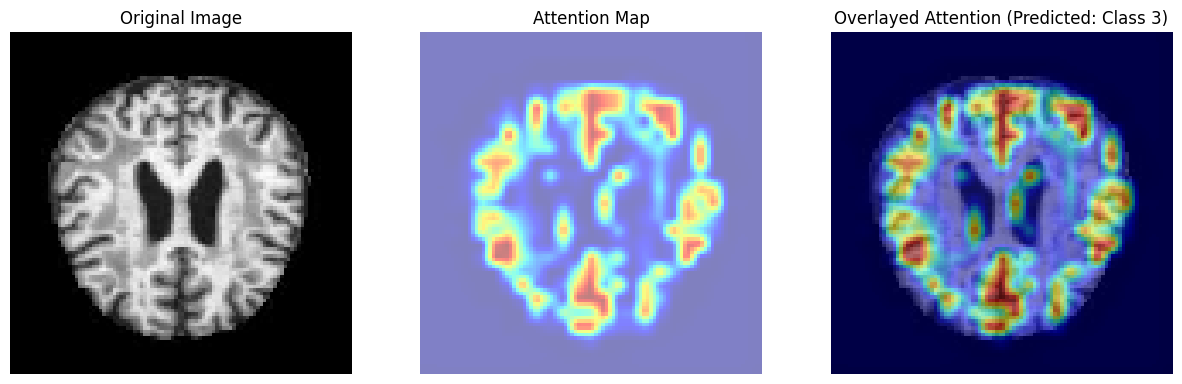

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


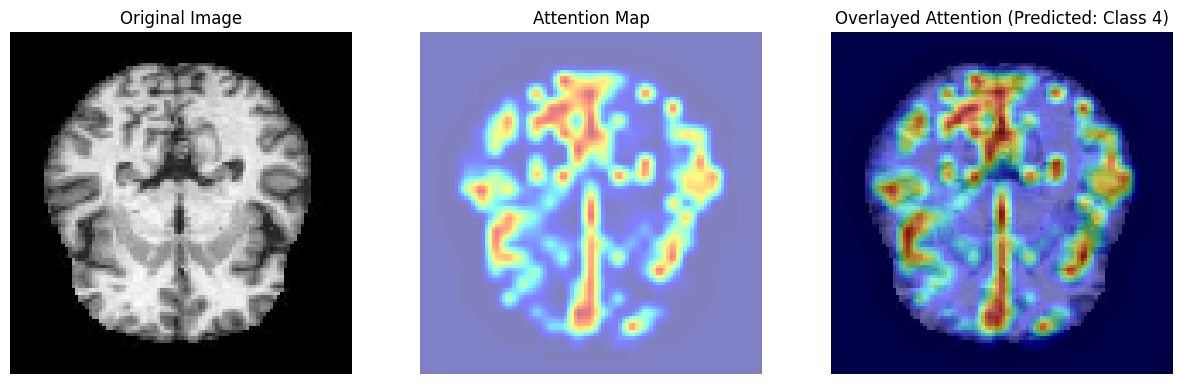

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


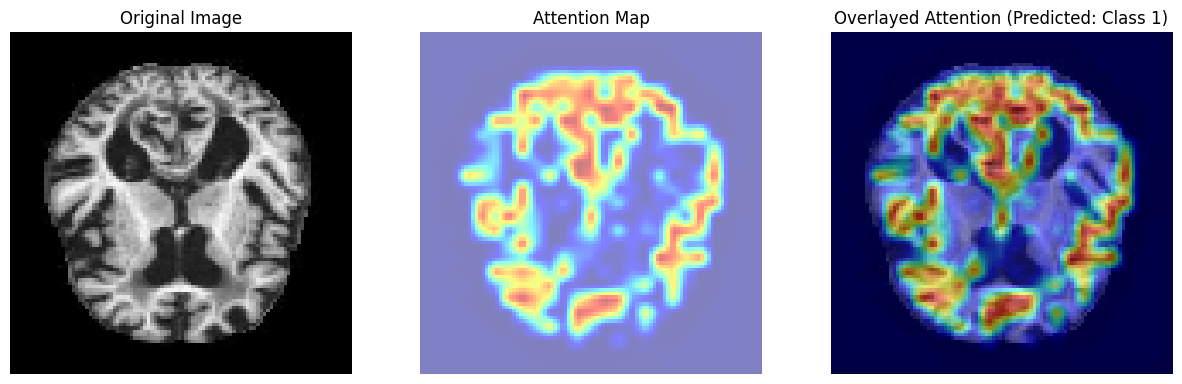

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


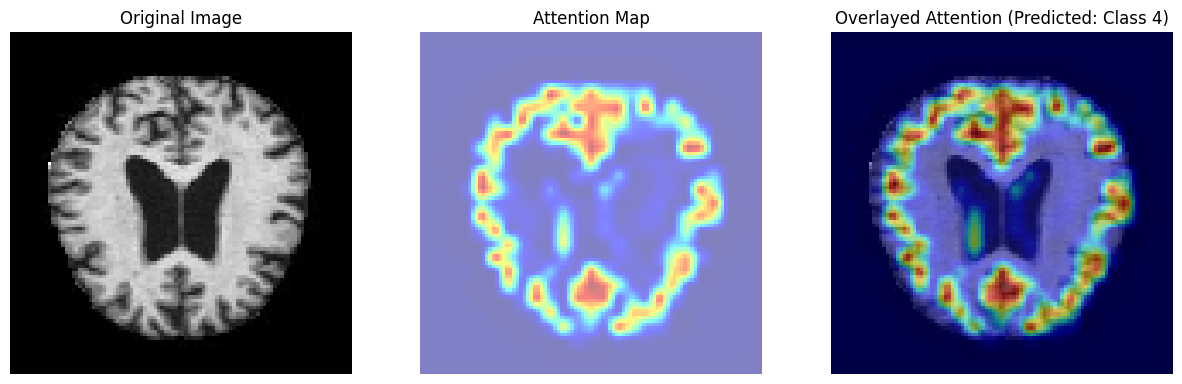

In [ ]:


class_images = [X_test[i] for i in range(10)]

class_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]  # Adjust to your classes

# Visualize the attention maps
visualize_attention(class_images, model, class_labels)
